In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read in data
raw = pd.read_csv('my_api_data.csv', index_col=0)
raw.head(13)

In [54]:
colnames = ['Now married (except separated)', 'Widowed', 'Divorced', 'Separated', 'Never married']
years = [i for i in range(2010, 2024) if i != 2020]

In [ ]:
## convert data to correct type

df = pd.DataFrame()

# 'Year' from str to int
df['year'] = raw['Year'].astype(int)
df['sex'] = raw['Sex']
df['age'] = raw['Age']
df['total'] = raw['Total'].astype(int)

# marital status columns from str to float
df[colnames] = raw[colnames].apply(lambda x: x.astype(float) / 100)

df.head(13)

,year,sex,age,total,Now married (except separated),Widowed,Divorced,Separated,Never married
0,2010,M,15+,11352610,0.007,0.000,0.000,0.001,0.992
1,2010,M,20+,31638358,0.294,0.001,0.035,0.014,0.656
2,2010,M,35+,20494598,0.617,0.004,0.117,0.029,0.233
3,2010,M,45+,22100095,0.644,0.010,0.160,0.028,0.158
4,2010,M,55+,17723303,0.700,0.025,0.162,0.022,0.092
5,2010,M,65+,17433645,0.709,0.131,0.099,0.013,0.047
6,2010,F,15+,10751573,0.015,0.000,0.001,0.001,0.983
7,2010,F,20+,30996555,0.367,0.002,0.050,0.025,0.556
8,2010,F,35+,20697730,0.625,0.010,0.142,0.043,0.180
9,2010,F,45+,22828938,0.623,0.031,0.189,0.037,0.121


In [ ]:
# female young adults
df_fya = df[(df['sex'] == 'F') & (df['age'] == '20+')]

df_fya_long = pd.melt(df_fya, id_vars=['year'], value_vars=colnames, var_name='Marital Status', value_name='Proportion')
df_fya_long

In [ ]:
## plot female young adults
plt.clf()
plt.figure()
sns.lineplot(data=df_fya_long, x='year', y='Proportion', hue='Marital Status')
plt.title('Female Young Adult Marital Status Over Time')
plt.xlabel('')
plt.ylabel('Estimated Population Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(2010, 2023 + 1, 1))
plt.xticks(rotation=-90)
# plt.savefig('Female Young Adult Marital Status Over Time', bbox_inches='tight')
plt.show()

In [ ]:
# female middle age adults
df_fma = df[((df['sex'] == 'F') & (df['age'] == '35+')) | ((df['sex'] == 'F') & (df['age'] == '45+'))]
print(df_fma)
for col in colnames:
    df_fma[col] = df_fma[col] * df_fma['total']
df_fma



In [40]:
df_fma2 = pd.DataFrame()

for year in years:
    row1 = df_fma[(df_fma['year'] == year) & (df_fma['age'] == '35+')].iloc[0]
    row2 = df_fma[(df_fma['year'] == year) & (df_fma['age'] == '45+')].iloc[0]
    row_sum = row1[3:] + row2[3:]
    addrow = pd.DataFrame([row_sum], columns=row_sum.index)
    addrow.insert(0, 'age', 'Middle')
    addrow.insert(0, 'sex', 'F')
    addrow.insert(0, 'year', year)

    df_fma2 = pd.concat([df_fma2, addrow], ignore_index=True)

for col in colnames:
    df_fma2[col] = df_fma2[col] / df_fma2['total']

df_fma2

,year,sex,age,total,Now married (except separated),Widowed,Divorced,Separated,Never married
0,2010,F,Middle,43526668,0.623951,0.021014,0.166651,0.039853,0.149056
1,2011,F,Middle,43182769,0.618050,0.020496,0.167092,0.040376,0.153461
2,2012,F,Middle,42872626,0.616477,0.020469,0.168127,0.040906,0.154021
3,2013,F,Middle,42548001,0.614562,0.019893,0.165473,0.039917,0.160676
4,2014,F,Middle,42470605,0.612589,0.019322,0.164411,0.038929,0.164749
5,2015,F,Middle,42357933,0.612097,0.019291,0.162355,0.037968,0.168290
6,2016,F,Middle,42094171,0.613572,0.018774,0.158808,0.036971,0.172389
7,2017,F,Middle,42086236,0.617528,0.017660,0.155566,0.035491,0.173264
8,2018,F,Middle,41892362,0.618033,0.017556,0.152689,0.035000,0.176715
9,2019,F,Middle,41701875,0.616952,0.016945,0.151297,0.033000,0.182309


In [ ]:
# female middle age adults
df_fma2_long = pd.melt(df_fma2, id_vars=['year'], value_vars=colnames, var_name='Marital Status', value_name='Proportion')
df_fma2_long

<Figure size 640x480 with 0 Axes>

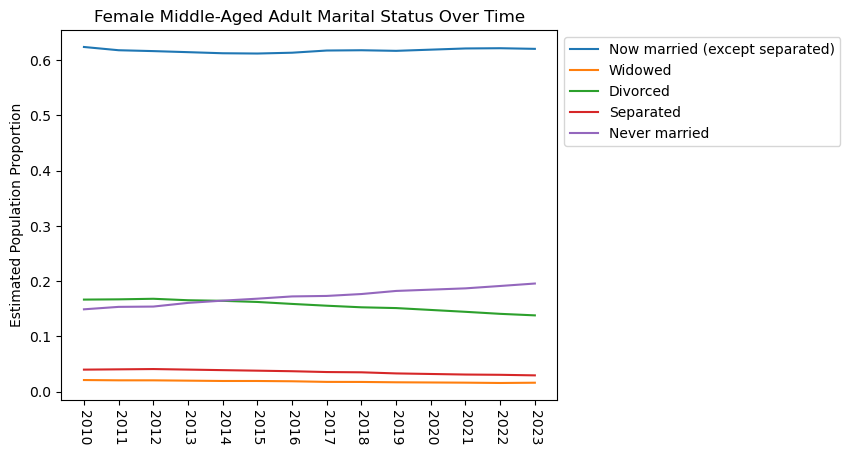

In [46]:
## plot female middle age adults
plt.clf()
plt.figure()
sns.lineplot(data=df_fma2_long, x='year', y='Proportion', hue='Marital Status')
plt.title('Female Middle-Aged Adult Marital Status Over Time')
plt.xlabel('')
plt.ylabel('Estimated Population Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(2010, 2023 + 1, 1))
plt.xticks(rotation=-90)
plt.savefig('Female Middle-Aged Adult Marital Status Over Time', bbox_inches='tight')
plt.show()

In [71]:
# female teens
df_ft = df[(df['sex'] == 'F') & (df['age'] == '15+')]

df_ft_long = pd.melt(df_ft, id_vars=['year'], value_vars=colnames, var_name='Marital Status', value_name='Proportion')
df_ft_long = df_ft_long.iloc[:52]
df_ft_long

,year,Marital Status,Proportion
0,2010,Now married (except separated),0.015
1,2011,Now married (except separated),0.014
2,2012,Now married (except separated),0.013
3,2013,Now married (except separated),0.014
4,2014,Now married (except separated),0.012
5,2015,Now married (except separated),0.012
6,2016,Now married (except separated),0.013
7,2017,Now married (except separated),0.013
8,2018,Now married (except separated),0.012
9,2019,Now married (except separated),0.011


<Figure size 640x480 with 0 Axes>

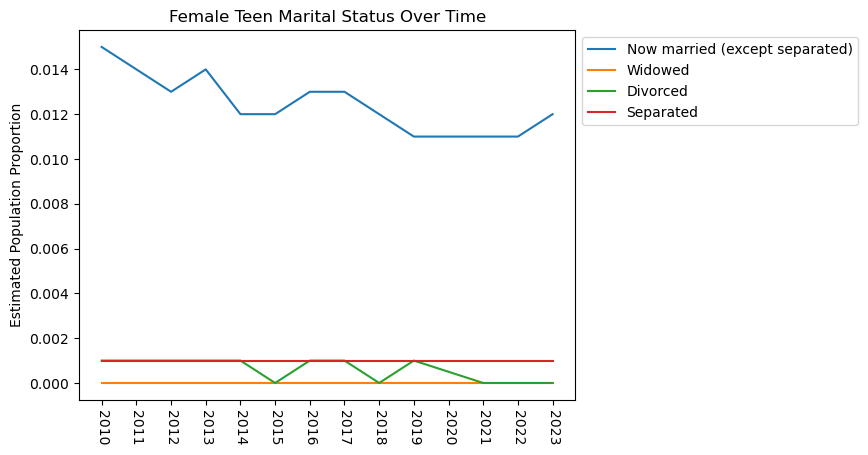

In [73]:
## plot female young adults
plt.clf()
plt.figure()
sns.lineplot(data=df_ft_long, x='year', y='Proportion', hue='Marital Status')
plt.title('Female Teen Marital Status Over Time')
plt.xlabel('')
plt.ylabel('Estimated Population Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(2010, 2023 + 1, 1))
plt.xticks(rotation=-90)
plt.savefig('Female Teen Marital Status Over Time', bbox_inches='tight')
plt.show()